# EJERCICIO 1

## A) Respecto la distribución de Weibull, modificar el código para obtener una distribución de duración de vida de tasa de fallo positiva, constante o negativa mostrando las figuras de dichas distribuciones.

Se ha usado la parametrización: $h=\frac{k}{\lambda^k}$; $c=k$

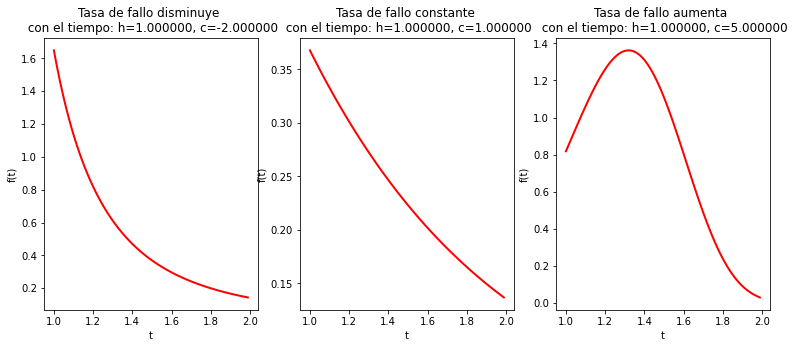

In [53]:
# Distribución Weibull

import numpy as np # importando numpy
from scipy import stats # importando scipy.stats
import pandas as pd # importando pandas
# Muy importante, que los gráficos salgan embebidos en la página.
%matplotlib inline 
# Importar la librería de visualización gráfica
import matplotlib.pyplot as plt # importando matplotlib

tmin, tmax = 1, 1000
t= np.linspace(tmin, tmax, tmax*100)
# media de la muestra seleccionanda al azar
xfSize=13
yfSize=5
plt.figure(figsize=(xfSize, yfSize))

plt.subplot(1, 3, 1);
# parámetros h y c 
h, c = 1, -2
W=(h*(t**(c-1))) * np.exp( - (h/c)*(t**c))
plt.title('Tasa de fallo disminuye \n con el tiempo: h=%f, c=%f'%(h,c))
plt.xlabel('t')
plt.ylabel('f(t)')
_ =plt.plot(t[0:100], W[0:100], linewidth=2, color='r')

plt.subplot(1, 3, 2);
# parámetros h y c (recordar que h es el parámetro Lambda)
h, c = 1, 1
W=(h*(t**(c-1))) * np.exp( - (h/c)*(t**c))
plt.title('Tasa de fallo constante \n con el tiempo: h=%f, c=%f'%(h,c))
plt.xlabel('t')
plt.ylabel('f(t)')
_ =plt.plot(t[0:100], W[0:100], linewidth=2, color='r')

# jugar con este código y ver cuando recuperais la distribución geométrica pura

plt.subplot(1, 3, 3);
# parámetros h y c (recordar que h es el parámetro Lambda)
h, c = 1, 5
W=(h*(t**(c-1))) * np.exp( - (h/c)*(t**c))
plt.title('Tasa de fallo aumenta \n con el tiempo: h=%f, c=%f'%(h,c))
plt.xlabel('t')
plt.ylabel('f(t)')
_ =plt.plot(t[0:100], W[0:100], linewidth=2, color='r')

## Por último modificar debilmente el código que os doy de Weibull para  obtener la distribución geométrica pura explicando porque se obtiene.

Se va a demostrar un caso particular en que la distribución de Weibull se aproxima a la distribución geométrica.

Consideremos el desarollo de Taylor alrededor de x=0 de la función $ln(1-x)$:

$$ln(1-x) = -\sum_{i=1}^{\infty}{\frac{x^n}{n}} = -x -\frac{x^2}{2} - \cdots$$

de donde se deduce que, si $x \longrightarrow 0^{+}$ entonces se cumple que $ln(1-x)\longrightarrow -x$, y por tanto, que $1-x\longrightarrow e^{-x}$. 

**(Nótese que si x=0, entonces $ln(1-0) = ln(1) = 0$ y se cumple la igualdad $ln(1-x) = -x$)

Ahora, consideremos una variable aleatoria $X \sim geom(p)$. Por el argumento anterior, si $p\longrightarrow 0^+$ se tiene que:

$$P\lbrace X = k+1\rbrace = p(1-p)^k \approx pe^{-kp}$$

es decir, la función de probabilidad de la geométrica es aproximadamente la de una distribución exponencial de parámetro $\lambda = p$. 

Por último, si consideramos una variable aleatoria $Y \sim Weibull(\lambda, k)$ tal que:

$$f_{\lambda, k}(y) = \frac{k}{\lambda}\left(\frac{y}{\lambda}\right)^{k-1}e^{-\left( \frac{y}{\lambda}\right)^k}$$

y haciendo $k=1$, se tiene:

$$f_{\lambda, 1}(y) = \frac{1}{\lambda}e^{- \frac{y}{\lambda}}$$

que es precisamente la función de densidad de la distribución exponencial con parámetro $1/\lambda$.

De este último resultado se deduce el resultado pedido:

$$f_{\lambda, 1}(y) = \frac{1}{\lambda}e^{- \frac{y}{\lambda}} \approx \frac{1}{\lambda}\left(1-\frac{1}{\lambda}\right)^y = P\lbrace X=y+1\rbrace$$ 

asumiendo, por supuesto, que $y \in Z^+$ en la última expresión.

Tomando las ideas de la demostración anterior, para ver la convergencia de la distribución geométrica a la distribución de Weibull, se toma la distribución de Weibull de los códigos anteriores para $c=1$ y $p\longrightarrow 0^+$ (pongamos $p=0.1$). Se aprecia que las probabilidades que arrojan son muy similares.

De hecho, como se puede ver en el desarrollo de Taylor del inicio de la prueba anterior, la distribución geométrica sobreestima a la de Weibull ligeramente.

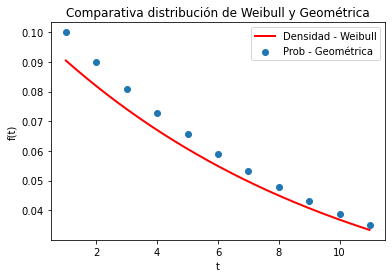

In [42]:
p=.1
k = np.array(range(1, 12))

plt.scatter(k, (p*(1-p)**(k-1)))

h, c = .1, 1
W=(h*(t**(c-1))) * np.exp( - (h/c)*(t**c))
plt.title('Comparativa distribución de Weibull y Geométrica')
plt.xlabel('t')
plt.ylabel('f(t)')
_ =plt.plot(t[0:1000], W[0:1000], linewidth=2, color='r')

plt.legend(['Densidad - Weibull', 'Prob - Geométrica'])
plt.show()

## B) Razonar y explicar como se ha realizado y se ha graficado la distribución de "Student" simulada, a partir de los códigos anteriores.

Primero se generan 100.000 muestras de 100 observaciones de una variable $X \sim N(0, 1)$. Despues se suman los 100 valores de cada muestra para obtener una muestra de 100.000 observaciones de una variable $Y = \sum_{i=1}{100}{X_i} \sim \chi^2_{100}$. Después, se divide cada valor por sus grados de libertad y se aplica una raíz cuadrada, es decir, se calcula la variable $S = \sqrt{\frac{Y}{100}} = \sqrt{\frac{\chi^2_{100}}{100}}$.

Finalmente, para obtener una $t$ de Student, se dividen los valores de la normal $X$ entre los valores de la variable $S$, es decir, una chi cuadrado dividida entre sus grados de libertad: 
$$T = \frac{X}{S} = \frac{Z}{\sqrt{\frac{\chi^2_{100}}{100}}}$$

## Demostrar gráficamente como en el límite de los grados de libertad hacía infinito, la variable t de Student tiende a una normal.

Para esta parte, se van a generar muestras de una t de Student de tamaño 1000 para grados de libertad: 5, 10, 20, 50, 100 y 1000. Y se va a comparar gráficamente la distribución con la de una normal $N(0,1)$. Se aprecia como a medida que crece el número de grados de libertad, las funciones de densidad de las $t$ son más similares a las de una normal, al mismo tiempo que las colas de la distribución son más similares a las de la normal.

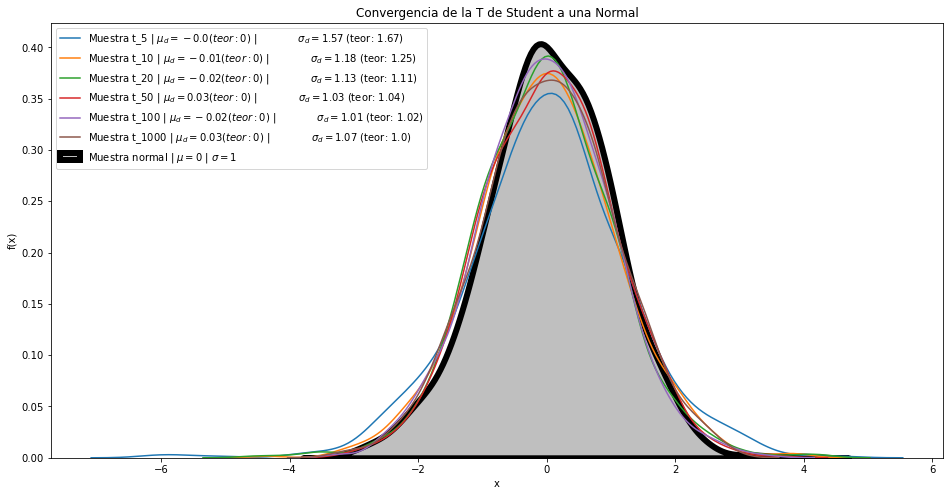

In [130]:
np.random.seed(1)
size=1000
samples = []
df = [5, 10, 20, 50, 100, 1000]
mu, sigma = 0, 1
normal_sample = np.random.normal(mu, sigma, size)

plt.figure(figsize=(16,8))

means, sigmas = [], []
for d in df:
    sample=np.random.standard_t(df=d, size=size)
    samples.append(sample), means.append(np.mean(sample)), sigmas.append(np.var(sample))
    
for sample in samples:
    
    sns.kdeplot(sample)

sns.kdeplot(normal_sample, fill=True, color='black', linewidth=6)

plt.legend([f'Muestra t_{d} | $\mu_d={round(means[ind], 2)} (teor: {0})$ | \
            $\sigma_d={round(sigmas[ind], 2)}$ (teor: {round(d/(d-2), 2)})' for ind, d in enumerate(df)]+['Muestra normal | $\mu=0$ | $\sigma=1$'])
plt.title('Convergencia de la T de Student a una Normal')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

# EJERCICIO 2